In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from statsmodels.graphics.mosaicplot import mosaic
import squarify    # pip install squarify (algorithm for treemap)


In [106]:
df = pd.read_csv('Music Sales.csv', index_col=None)

In [107]:
df_EA=df[df['Region'].isin(['Europe', 'Asia'])].copy()

In [108]:
df_EA.sample()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,MediaType,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice
460,AcÃºstico,TitÃ£s,6.31M,3.96,Rome,NaN,TitÃ£s,Italy,47,lucas.mancini@yahoo.it,...,MPEG audio file,189988,1,+39 06 39733434,192,4,Europe,RM,NÃ£o Vou Lutar,0.99


## Question 1 Sales Distribution by Region Using Tree maps


In [109]:
df_EA['RSales'] = df_EA['Quantity'] * df_EA['UnitPrice']

In [110]:
df_EA.sample()

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice,RSales
1196,Greatest Hits II,Queen,12.66M,4.95,Paris,NaN,Queen,France,40,dominiquelefebvre@gmail.com,...,387761,1,+33 01 47 42 71 71,75002,5,Europe,NaN,Innuendo,0.99,4.95


In [111]:
df_3 = df_EA[['Country','RSales']].groupby('Country').sum()


In [112]:
df_3['Percentage'] = df_3['RSales']/df_3['RSales'].sum()

In [113]:
df_3['Percentage'] = df_3['Percentage'] * 100

In [114]:
df_3 = df_3.round(2)

In [115]:
df_3.reset_index(inplace = True)

In [116]:
india = df_3[df_3.Country == 'India']

df_3 =df_3[df_3.Country != 'India']


In [117]:
india

,Country,RSales,Percentage
8,India,210.91,6.18


In [118]:
df_3 = df_3.sort_values(by='Percentage', ascending=False)

In [119]:
import matplotlib

norm = matplotlib.colors.Normalize(vmin=min(df_3.RSales), vmax=max(df_3.RSales))
colors = [matplotlib.cm.Oranges(norm(value)) for value in df_3.RSales]

In [120]:
df_3 = df_3.append(india)

In [121]:
df_3['Labels'] = df_3['Country'] +"\n"+ df_3['Percentage'].astype(str) +"%"

In [122]:
df_3

,Country,RSales,Percentage,Labels
5,France,562.50,16.47,France\n16.47%
6,Germany,421.88,12.35,Germany\n12.35%
17,United Kingdom,301.95,8.84,United Kingdom\n8.84%
2,Czech Republic,269.72,7.90,Czech Republic\n7.9%
14,Portugal,197.05,5.77,Portugal\n5.77%
7,Hungary,168.61,4.94,Hungary\n4.94%
4,Finland,136.77,4.00,Finland\n4.0%
11,Netherlands,132.78,3.89,Netherlands\n3.89%
9,Ireland,125.93,3.69,Ireland\n3.69%
0,Austria,123.89,3.63,Austria\n3.63%


In [123]:
colors.append((135/255,206/255,250/255, 1.0))

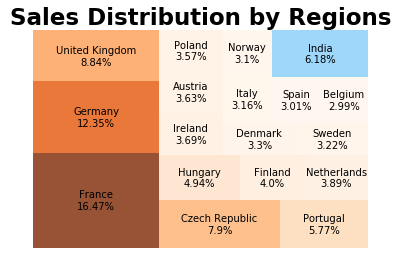

In [124]:
squarify.plot(label=df_3.Labels,sizes=df_3.Percentage, color = colors, alpha=.8)
plt.title("Sales Distribution by Regions",fontsize=23,fontweight="bold")

plt.axis('off')
plt.show()

## Q2. Use the same data set (Music Sales.csv) and come up with one research question that you’d like to answer and need 3 variables to answer the question. Here is a useful reference for plottin

### My Question is:
### Which countries love the Rock music most (top 10 countries), and which rock Bands are the most popular among these countries?

In [172]:
df_r = df[df['Genre']== 'Rock']

In [173]:
df_r['RSales'] = df_r['Quantity'] * df_r['UnitPrice']

C:\Users\kids1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
res= pd.DataFrame({"RSales": df_r.groupby(['Country']).sum()['RSales']}).reset_index().sort_values(by=["RSales"],ascending=False).head() 

In [201]:
df_r_0 = df_r[df_r.Country.isin(res['Country'])]

In [202]:
res2 = pd.DataFrame({"RSales": df_r_0.groupby(['Artist']).sum()['RSales']}).reset_index().sort_values(by=["RSales"],ascending=False).head() 

In [203]:
df_r_1 = df_r_0[df_r_0.Artist.isin(res2['Artist'])]

In [204]:
df_r_1

,Album,Artist,Bytes,Sales,City,Company,Composer,Country,CustomerID,Email,...,Milliseconds,Number of Records,Phone,PostalCode,Quantity,Region,State,Track,UnitPrice,RSales
60,BBC Sessions [Disc 1] [Live],Led Zeppelin,20.14M,0.99,Stuttgart,NaN,J B Lenoir/Willie Dixon,Germany,2,leonekohler@surfeu.de,...,619467,1,+49 0711 2842222,70174,1,Europe,NaN,You Shook Me(2),0.99,0.99
61,Greatest Hits II,Queen,8.19M,0.99,Stuttgart,NaN,Queen,Germany,2,leonekohler@surfeu.de,...,248032,1,+49 0711 2842222,70174,1,Europe,NaN,I'm Going Slightly Mad,0.99,0.99
65,BBC Sessions [Disc 1] [Live],Led Zeppelin,13.04M,1.98,Stuttgart,NaN,Jimmy Page,Germany,2,leonekohler@surfeu.de,...,401920,1,+49 0711 2842222,70174,2,Europe,NaN,Dazed and Confused,0.99,1.98
70,Greatest Hits II,Queen,11.36M,2.97,Stuttgart,NaN,Roger Taylor,Germany,2,leonekohler@surfeu.de,...,343745,1,+49 0711 2842222,70174,3,Europe,NaN,Radio GA GA,0.99,2.97
90,MK III The Final Concerts [Disc 1],Deep Purple,20.10M,1.98,Halifax,NaN,Gillan/Glover/Lord/Paice,Canada,31,marthasilk@gmail.com,...,618031,1,+1 (902) 450-0450,B3S 1C5,2,North America,NS,Smoke On The Water,0.99,1.98
96,Physical Graffiti [Disc 1],Led Zeppelin,11.15M,3.96,Halifax,NaN,John Paul Jones,Canada,31,marthasilk@gmail.com,...,336692,1,+1 (902) 450-0450,B3S 1C5,4,North America,NS,Trampled Under Foot,0.99,3.96
126,Come Taste The Band,Deep Purple,8.00M,1.98,São Paulo,Woodstock Discos,Bolin/Coverdale,Brazil,10,eduardo@woodstock.com.br,...,242834,1,+55 (11) 3033-5446,01007-010,2,South America,SP,Drifter,0.99,1.98
127,Deep Purple In Rock,Deep Purple,20.23M,1.98,São Paulo,Woodstock Discos,"Blackmore, Gillan, Glover, Lord, Paice",Brazil,10,eduardo@woodstock.com.br,...,620460,1,+55 (11) 3033-5446,01007-010,2,South America,SP,Child In Time,0.99,1.98
128,Purpendicular,Deep Purple,8.51M,1.98,São Paulo,Woodstock Discos,"Ian Gillan, Roger Glover, Jon Lord, Steve Mors...",Brazil,10,eduardo@woodstock.com.br,...,257384,1,+55 (11) 3033-5446,01007-010,2,South America,SP,Vavoom : Ted The Mechanic,0.99,1.98
130,Fireball,Deep Purple,13.65M,2.97,São Paulo,Woodstock Discos,"Ritchie Blackmore, Ian Gillan, Roger Glover, J...",Brazil,10,eduardo@woodstock.com.br,...,414902,1,+55 (11) 3033-5446,01007-010,3,South America,SP,No No No,0.99,2.97


In [218]:
df_r_3 = df_r_1.groupby(['Country', 'Artist'])['RSales'].sum().reset_index()


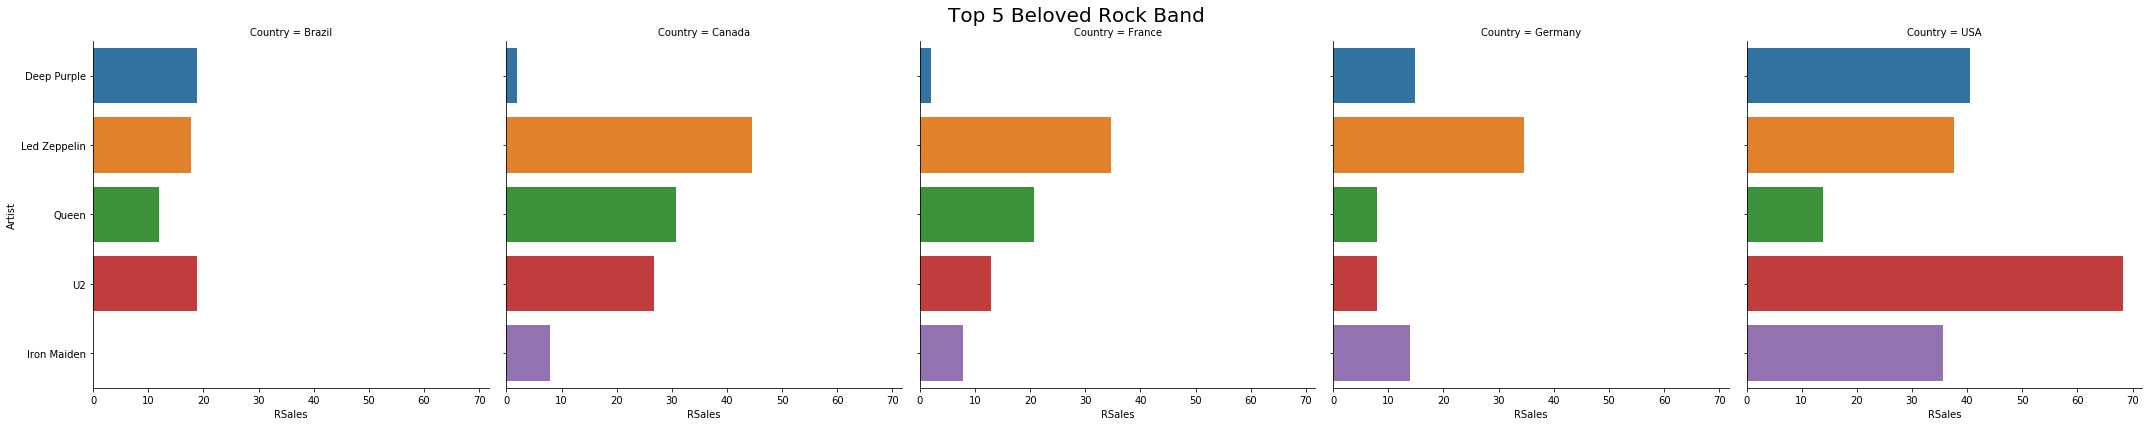

In [244]:
ax = sns.catplot(x="RSales", y="Artist", 
...                  col="Country",
...                 data=df_r_3, kind="bar",
...                 height=6);
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Top 5 Beloved Rock Band', size=20)

plt.show()

In [225]:
df_r_2 = df_r_1.groupby(['Country', 'Artist']).sum()['RSales']


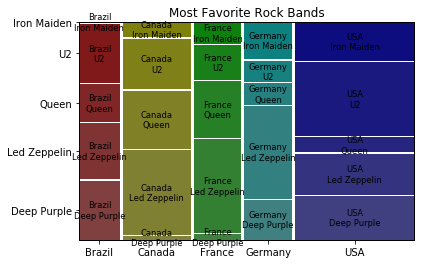

In [230]:
mosaic(df_r_2, gap=0.01,title='Most Favorite Rock Bands')
plt.show()

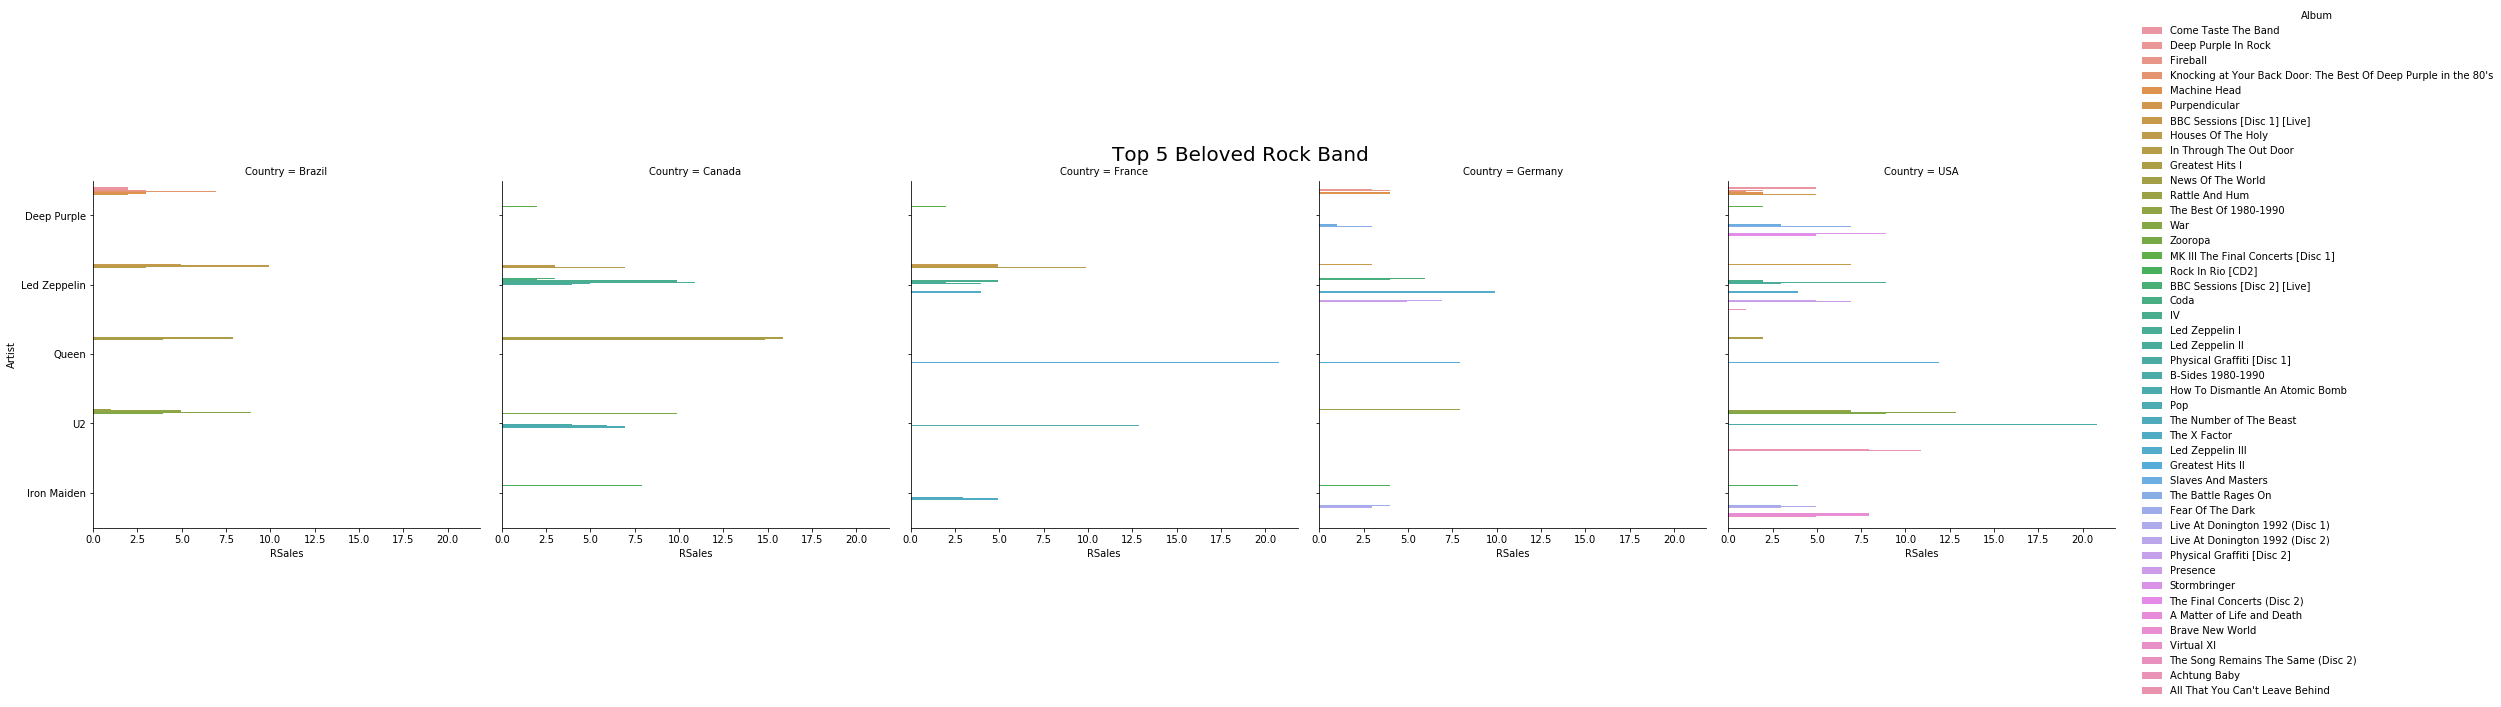

In [245]:
df_r_4 = df_r_1.groupby(['Country', 'Artist', 'Album'])['RSales'].sum().reset_index()
ax = sns.catplot(x="RSales", y="Artist", hue = "Album", col ="Country", data=df_r_4, kind="bar", height=6);
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Top 5 Beloved Rock Band', size=20)
plt.show()

#### It shows that Brazil, Canada, France, Germany, and US love the rock music. People in US love U2, while in Canada, France and Germany people perfer led zeppelin. Deep Purple, Led Zeppelin, Queen, U2, and Iron Maiden are the most popular Rock band in the world. 

It seems that Iron Maiden is not famous in Brazil. The Queen band is very popular in Canada. 